# **EMG Signal Analysis & Visualization**

# METADATA – Descripción de los datos

**1.  Descripción de los datos**

El dataset contiene señales electromiográficas (EMG) adquiridas mediante electrodos superficiales conectados a un módulo AD8232 y digitalizadas a 1 kHz utilizando un microcontrolador STM32.

Cada registro representa una medición de diferencia de potencial en milivoltios correspondiente a la actividad eléctrica muscular en un instante de tiempo determinado correspondientes a estados de reposo y contracción muscular voluntaria.

Las señales fueron almacenadas para su posterior análisis en Python con el objetivo de caracterizar estadísticamente la activación muscular y validar el procesamiento digital implementado en el sistema embebido.

**2.   Diccionario de Datos**

time ------------------------ Tiempo en segundos

emg1 ------------------------ Señal EMG músculo 1 (mV)

state ------------------------ Estado muscular: reposo / low-contraction / contracción

sample_id ------------------------ Número de muestra único para cada lectura

muscle ------------------------ Nombre del músculo donde se tomó la señal EMG (Bicep, Tricep, Cuadriceps, Deltoides, Pectorales, Dorsales, Trapecio superior, Flexores muñeca)

patience_age ------------------------ Edad de la persona en años al momento de la toma de la señal EMG

patience_sex ------------------------ F / M

emg_raw ------------------------ Señal EMG cruda medida por el ADC (0–4095)

emg_rect ------------------------ Señal EMG rectificada, tomando el valor absoluto con el offset 2048: |emg_raw - 2048|

emg_voltage ------------------------ Conversión de la señal EMG cruda a voltaje: V=(ADC/4095)*3.3

contraction % ------------------------ Contracción relativa en porcentaje respecto al máximo de ese músculo y paciente

date ------------------------ Fecha y hora de la toma de la señal EMG (dd/mm/aaaa hh:mm:ss)



# OBJETIVO ANALITICO



**1.   objetivo**

Analizar el comportamiento estadístico y temporal de señales EMG para determinar si es posible discriminar estados de reposo y contracción muscular a partir de métricas cuantitativas como amplitud, varianza y RMS.

**2.  Pregunta problema**

¿La señal EMG permite identificar de manera clara y consistente los períodos de contracción muscular respecto al reposo?

**3.  Hipótesis**

H1: El valor RMS de la señal EMG es mayor durante contracción que en reposo.

H2: La varianza de la señal aumenta significativamente en estado de activación muscular.

H3: Si se registran dos músculos simultáneamente, existe correlación positiva durante contracción conjunta.


# Importación de Data

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
!gdown 177r-hlIkP-St-XIDz3xTyq7R3bhNnnLI
df = pd.read_excel('emg-database.xlsx')
df.head()

Downloading...
From: https://drive.google.com/uc?id=177r-hlIkP-St-XIDz3xTyq7R3bhNnnLI
To: /content/emg-database.xlsx
100% 38.9k/38.9k [00:00<00:00, 49.0MB/s]


,sample_id,muscle,patient_age,patient_sex,time (seg),emg_raw,emg_rect |emg_raw - 2048|,emg_mean_window,emg_std_window,emg_voltage V=(ADC/4095)​×3.3,state,contraction %,date
0,1.0,bicep,20,M,1,2045,3,5.0,5.727128,1.647985,rest,0.001190,2026-02-13 00:00:00
1,2.0,bicep,20,M,2,2052,4,44.8,91.634055,1.653626,rest,0.002381,2026-02-13 00:00:01
2,3.0,bicep,20,M,3,2038,10,83.6,141.534448,1.642344,rest,0.009524,2026-02-13 00:00:02
3,4.0,bicep,20,M,4,2050,2,136.0,186.571166,1.652015,rest,0.000000,2026-02-13 00:00:03
4,5.0,bicep,20,M,5,2042,6,189.2,237.619023,1.645568,rest,0.004762,2026-02-13 00:00:04


# Dataset Visualization

## Descriptive Analysis

In [60]:
df = pd.read_excel('emg-database.xlsx')
df.head()

,sample_id,muscle,patient_age,patient_sex,time (seg),emg_raw,emg_rect |emg_raw - 2048|,emg_mean_window,emg_std_window,emg_voltage V=(ADC/4095)​×3.3,state,contraction %,date
0,1.0,bicep,20,M,1,2045,3,5.0,5.727128,1.647985,rest,0.001190,2026-02-13 00:00:00
1,2.0,bicep,20,M,2,2052,4,44.8,91.634055,1.653626,rest,0.002381,2026-02-13 00:00:01
2,3.0,bicep,20,M,3,2038,10,83.6,141.534448,1.642344,rest,0.009524,2026-02-13 00:00:02
3,4.0,bicep,20,M,4,2050,2,136.0,186.571166,1.652015,rest,0.000000,2026-02-13 00:00:03
4,5.0,bicep,20,M,5,2042,6,189.2,237.619023,1.645568,rest,0.004762,2026-02-13 00:00:04


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   sample_id                      360 non-null    float64       
 1   muscle                         360 non-null    object        
 2   patient_age                    360 non-null    int64         
 3   patient_sex                    360 non-null    object        
 4   time (seg)                     360 non-null    int64         
 5   emg_raw                        360 non-null    int64         
 6   emg_rect |emg_raw - 2048|      360 non-null    int64         
 7   emg_mean_window                360 non-null    float64       
 8   emg_std_window                 360 non-null    object        
 9   emg_voltage V=(ADC/4095)​×3.3  360 non-null    float64       
 10  state                          360 non-null    object        
 11  contraction %      

In [62]:
df.shape


(360, 13)

In [63]:
df.isnull().sum()

,0
sample_id,0
muscle,0
patient_age,0
patient_sex,0
time (seg),0
emg_raw,0
emg_rect |emg_raw - 2048|,0
emg_mean_window,0
emg_std_window,0
emg_voltage V=(ADC/4095)​×3.3,0


## Identificación de valores perdidos

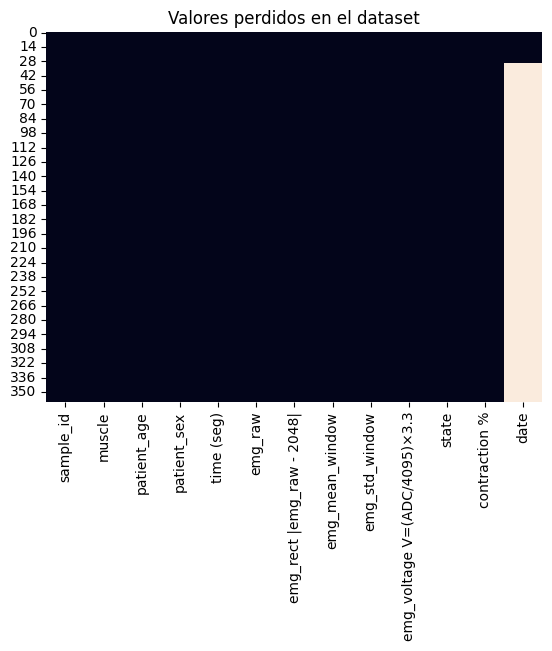

In [64]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Valores perdidos en el dataset")
plt.show()

## Análisis Univariado

In [65]:
print(df.describe())

        sample_id  patient_age  time (seg)      emg_raw  \
count  360.000000     360.0000  360.000000   360.000000   
mean     9.244531      26.7500    8.000000  2282.494444   
min      1.000000       9.0000    1.000000    35.000000   
25%      6.000000      17.0000    4.000000  2041.750000   
50%     11.000000      21.0000    8.000000  2225.000000   
75%     12.009723      32.0000   12.000000  2523.250000   
max     15.000000      60.0000   15.000000  2973.000000   
std      3.960116      14.0381    4.326507   302.205569   

       emg_rect |emg_raw - 2048|  emg_mean_window  \
count                 360.000000       360.000000   
mean                  276.211111       278.539028   
min                     0.000000         4.200000   
25%                    52.250000       114.350000   
50%                   182.000000       247.500000   
75%                   493.250000       415.950000   
max                  2013.000000      1042.800000   
std                   264.506952       190.0

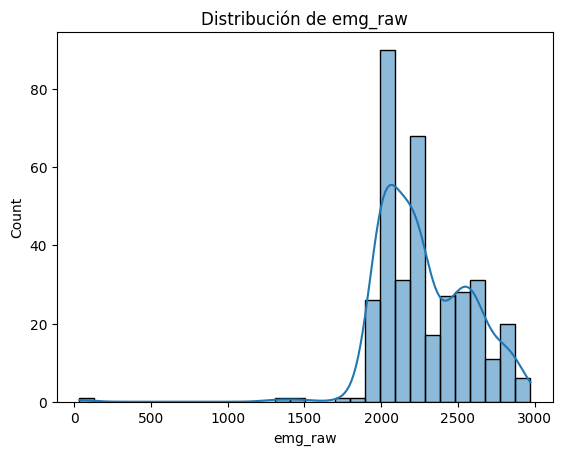

In [66]:
# Distribución de emg_raw por músculo
sns.histplot(df['emg_raw'], bins=30, kde=True)
plt.title("Distribución de emg_raw")
plt.show()


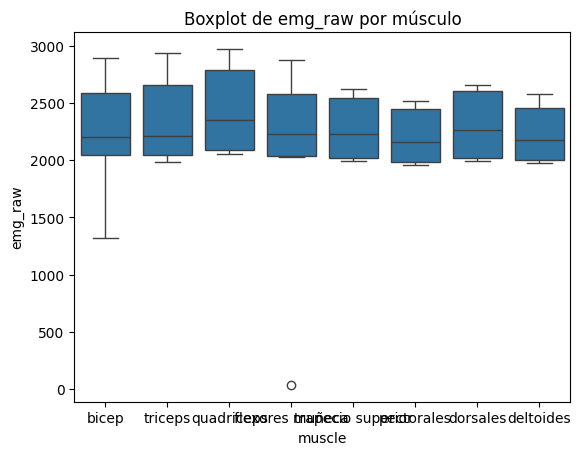

In [67]:
# Boxplot por músculo
sns.boxplot(x='muscle', y='emg_raw', data=df)
plt.title("Boxplot de emg_raw por músculo")
plt.show()


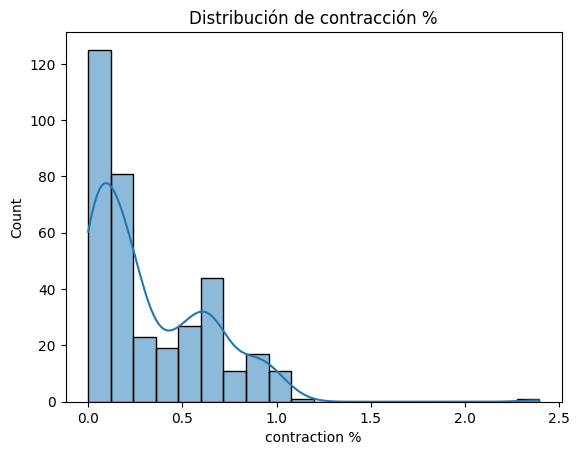

In [68]:
# Distribución de contracción %
sns.histplot(df['contraction %'], bins=20, kde=True)
plt.title("Distribución de contracción %")
plt.show()


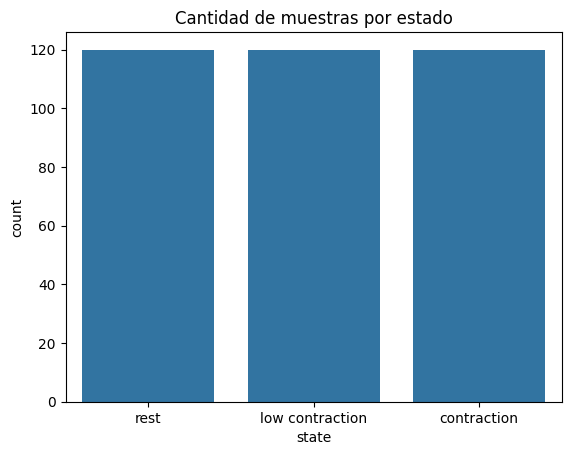

In [69]:
# Estado muscular
sns.countplot(x='state', data=df)
plt.title("Cantidad de muestras por estado")
plt.show()

## Procesamiento de señal

In [70]:
print(df.columns.tolist())

['sample_id', 'muscle', 'patient_age', 'patient_sex', 'time (seg)', 'emg_raw', 'emg_rect |emg_raw - 2048|', 'emg_mean_window', 'emg_std_window', 'emg_voltage V=(ADC/4095)\u200b×3.3', 'state', 'contraction %', 'date']


In [71]:
df.rename(columns=lambda x: x.strip().replace("​",""), inplace=True)

In [72]:
df['emg_rect'] = (df['emg_raw'] - 2048).abs()

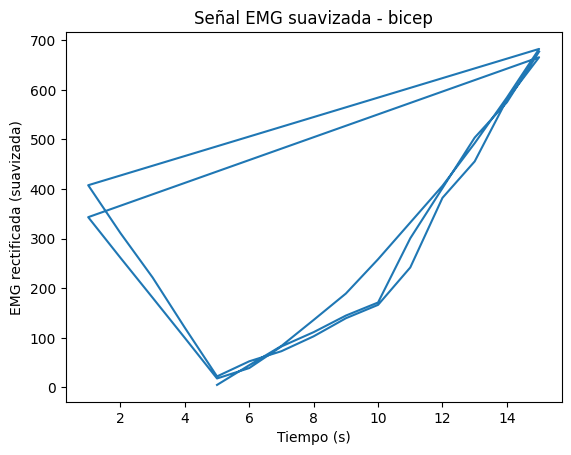

In [73]:
window_size = 5
df['emg_rect_smooth'] = df['emg_rect'].rolling(window=window_size).mean()

# Graficar ejemplo
muscle = 'bicep'
plt.plot(df[df['muscle']==muscle]['time (seg)'], df[df['muscle']==muscle]['emg_rect_smooth'])
plt.title(f"Señal EMG suavizada - {muscle}")
plt.xlabel("Tiempo (s)")
plt.ylabel("EMG rectificada (suavizada)")
plt.show()

## Análisis Bivariado

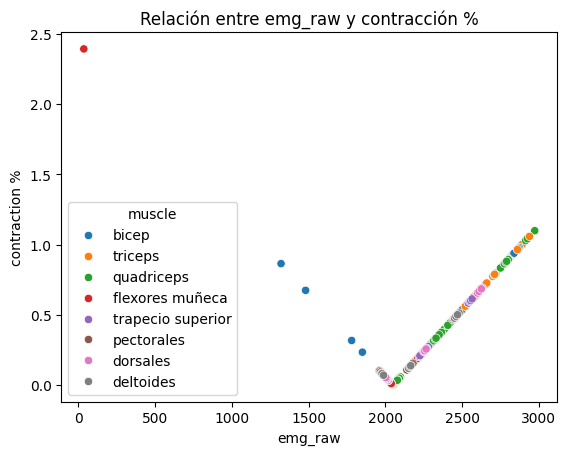

In [74]:
# Correlación entre emg_raw y contracción %
sns.scatterplot(x='emg_raw', y='contraction %', hue='muscle', data=df)
plt.title("Relación entre emg_raw y contracción %")
plt.show()

## Análisis Multivariado

In [75]:
print(df.columns.tolist())

['sample_id', 'muscle', 'patient_age', 'patient_sex', 'time (seg)', 'emg_raw', 'emg_rect |emg_raw - 2048|', 'emg_mean_window', 'emg_std_window', 'emg_voltage V=(ADC/4095)×3.3', 'state', 'contraction %', 'date', 'emg_rect', 'emg_rect_smooth']


In [76]:
# Crear emg_rect si no existe
if 'emg_rect' not in df.columns:
    df['emg_rect'] = (df['emg_raw'] - 2048).abs()

In [77]:
df['emg_rect'] = pd.to_numeric(df['emg_rect'], errors='coerce').fillna(0)

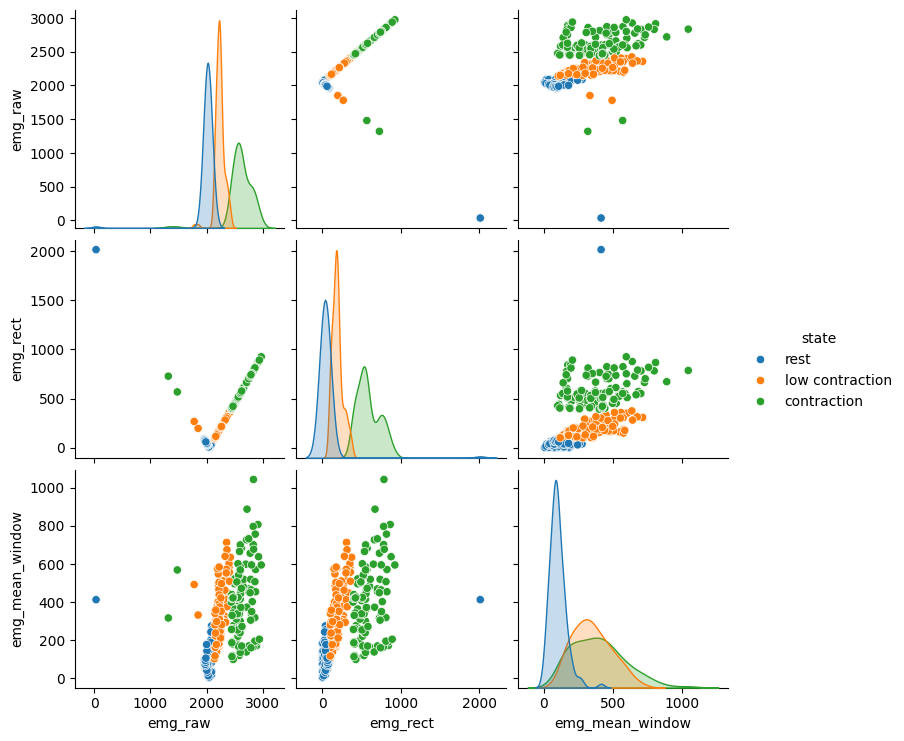

In [78]:
# Pairplot para explorar relaciones entre variables numéricas y estado
sns.pairplot(df[['emg_raw','emg_rect','emg_mean_window','state']], hue='state')
plt.show()

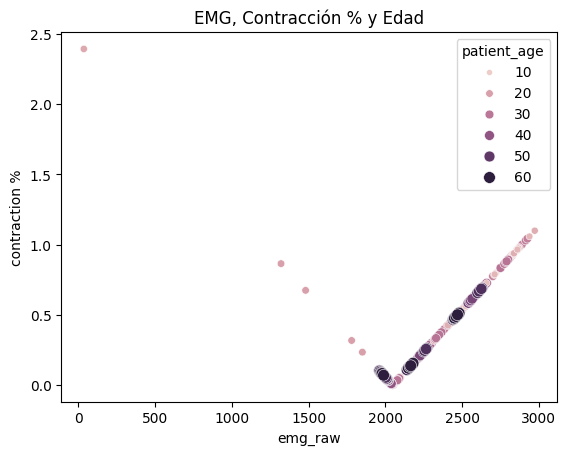

In [79]:
# EMG vs Contracción % vs Edad
sns.scatterplot(x='emg_raw', y='contraction %', hue='patient_age', size='patient_age', data=df)
plt.title("EMG, Contracción % y Edad")
plt.show()

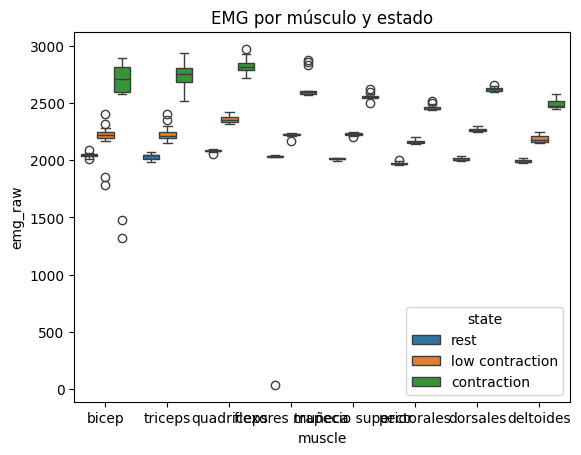

In [80]:
# Boxplot multivariante por estado y músculo
sns.boxplot(x='muscle', y='emg_raw', hue='state', data=df)
plt.title("EMG por músculo y estado")
plt.show()